Libraries and Data

In [1]:
# Change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product

/content/drive/MyDrive/Time Series Forecasting Product


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid


In [3]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv')
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [4]:
# Rename Variable
df = df.rename(columns = {'Demand': 'y',
                          'Date': 'ds'})
df.head(0)

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing


In [5]:
# Date Variable
df.ds = pd.to_datetime(df.ds,format ="%m/%d/%Y")
df.ds

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2187   2020-12-27
2188   2020-12-28
2189   2020-12-29
2190   2020-12-30
2191   2020-12-31
Name: ds, Length: 2192, dtype: datetime64[ns]

Holidays

In [6]:
# Easter
dates = pd.to_datetime(df[df.Easter == 1].ds)
easter = pd.DataFrame({'holiday':'easter',
              'ds':dates,
              'lower_window': -5, # how many days to look i the past in order to see an impact
              'upper_window': 2})


In [7]:
# Thanksgiving
dates = pd.to_datetime(df[df.Thanksgiving == 1].ds)
thanksgiving = pd.DataFrame({'holiday':'thanksgiving',
              'ds':dates,
              'lower_window': -3, # how many days to look i the past in order to see an impact
              'upper_window': 6})
thanksgiving

,holiday,ds,lower_window,upper_window
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6
1792,thanksgiving,2019-11-28,-3,6
2156,thanksgiving,2020-11-26,-3,6


In [8]:
# Combining events
holidays = pd.concat([easter,thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6


In [9]:
df = df.drop(columns = ["Easter", "Thanksgiving"])
df.head(0)

,ds,y,Christmas,Temperature,Marketing


Facebook Prophet Model

In [10]:
# FB model
m = Prophet(holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
m.add_regressor('Christmas')
m.add_regressor('Temperature')
m.add_regressor('Marketing')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/z_qm5_2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wbj9nm9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65247', 'data', 'file=/tmp/tmpkvcvufkk/z_qm5_2q.json', 'init=/tmp/tmpkvcvufkk/wbj9nm9k.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeli7kf7tqw/prophet_model-20231025015640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:56:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Check how many observation we have
df.shape[0] - 180

2012

In [12]:
# Cross-validation
df_cv = cross_validation(m,
                         horizon = '31 days',
                         period = '16 days',
                         initial = '2012 days',
                         parallel = 'processes')
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60024ab4c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hnxzljf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/65a1lsd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/pemtmgly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41034', 'data', 'file=/tmp/tmpkvcvufkk/65a1lsd4.json', 'init=/tmp/tmpkvcvufkk/pemtmgly.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model3psfp50v/prophet_model-20231025015645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:56:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/2nxr9wh5.json
DE

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.367413,538.040072,673.611010,571.069531,2020-07-09
1,2020-07-11,722.175178,663.668104,787.344388,677.106981,2020-07-09
2,2020-07-12,637.038170,572.882687,697.489066,619.572774,2020-07-09
3,2020-07-13,769.300007,704.424973,840.827924,808.932621,2020-07-09
4,2020-07-14,636.676862,574.551167,707.080603,661.791644,2020-07-09


In [13]:
# Performance
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2828.051674,53.179429,43.364264,0.058925,0.060902,0.060042,0.767742
1,5 days,2814.628898,53.053076,44.401202,0.062050,0.064086,0.062879,0.767742
2,6 days,3519.971111,59.329344,50.463632,0.069747,0.064086,0.071202,0.732258
3,7 days,2800.210189,52.917012,42.919490,0.060501,0.058957,0.061577,0.735484
4,8 days,2756.975543,52.506909,40.490978,0.055964,0.056503,0.057483,0.735484


In [14]:
# RMSE and MAPE
print("RMSE: ", round(performance_metrics(df_cv)["rmse"].mean(),1 ))
print("MAPE: ", 100 * round(performance_metrics(df_cv)["mape"].mean(),3), "%")

RMSE:  53.8
MAPE:  5.800000000000001 %


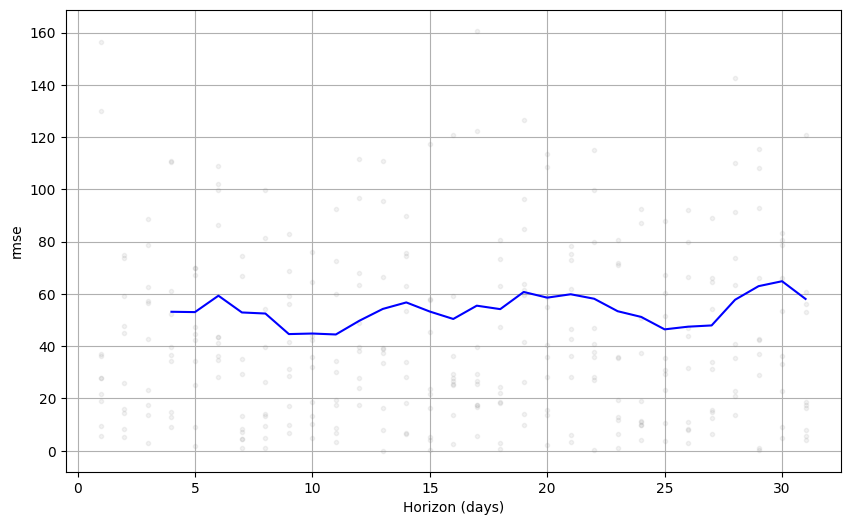

In [15]:
# Plot
# Is there an increase over time of the error?
# Is my forecast less reliable as time goes by?
plot_cross_validation_metric(df_cv, metric = 'rmse');

Parameter Tuning

In [16]:
# Parameter Grid
param_grid = {'seasonality_mode': ["additive", "multiplicative"],
              'seasonality_prior_scale': [1,5,10,20],
              'holidays_prior_scale': [5,10,20,25],
              'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))

128

In [17]:
# Store the result
rmse = []

#Loop
i = 1
for params in grid:
  print(f"{i} / {len(list(grid))}")
  # model
  m = Prophet(holidays = holidays,
            seasonality_mode = params['seasonality_mode'],
            seasonality_prior_scale = params['seasonality_prior_scale'],
            holidays_prior_scale = params['holidays_prior_scale'],
            changepoint_prior_scale = params['changepoint_prior_scale'])
  m.add_regressor('Christmas')
  m.add_regressor('Temperature')
  m.add_regressor('Marketing')
  m.fit(df)

  #cv
  df_cv = cross_validation(m,
                         horizon = '31 days',
                         period = '16 days',
                         initial = '2012 days',
                         parallel = 'processes')

  # measure the error and store the result
  error = performance_metrics(df_cv)["rmse"].mean()
  rmse.append(error)

  i += 1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ce5tz5ic.json


1 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ne1zsgkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90856', 'data', 'file=/tmp/tmpkvcvufkk/ce5tz5ic.json', 'init=/tmp/tmpkvcvufkk/ne1zsgkv.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelfe_som3i/prophet_model-20231025015707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015abe50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/b2pr8_nz.json
DEBUG:cmdstanpy:input tempfile:

2 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/q4yo6w_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72363', 'data', 'file=/tmp/tmpkvcvufkk/k8t3rln0.json', 'init=/tmp/tmpkvcvufkk/q4yo6w_e.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modela4txyogr/prophet_model-20231025015716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6002679f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/vs5x0wud.json
DEBUG:cmdstanpy:input tempfile:

3 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3w8rfch6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2462', 'data', 'file=/tmp/tmpkvcvufkk/blg_l88v.json', 'init=/tmp/tmpkvcvufkk/3w8rfch6.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqehvt682/prophet_model-20231025015725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001758850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/gokzua59.json
DEBUG:cmdstanpy:input tempfile: 

4 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/flcfhs10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67517', 'data', 'file=/tmp/tmpkvcvufkk/qtda7taq.json', 'init=/tmp/tmpkvcvufkk/flcfhs10.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelhzafi_1c/prophet_model-20231025015733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015abf10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xa9ctolr.json
DEBUG:cmdstanpy:input tempfile:

5 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/iy4jxlzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93917', 'data', 'file=/tmp/tmpkvcvufkk/fqlcxo0m.json', 'init=/tmp/tmpkvcvufkk/iy4jxlzr.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1bb3ygy3/prophet_model-20231025015742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6038d1e980>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/iqtqima4.json
DEBUG:cmdstanpy:input tempfile:

6 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xsf8um7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79442', 'data', 'file=/tmp/tmpkvcvufkk/bt8y5af1.json', 'init=/tmp/tmpkvcvufkk/xsf8um7e.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelk9jufb9r/prophet_model-20231025015751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6002bd46a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/6wwp99jr.json
DEBUG:cmdstanpy:input tempfile:

7 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xu9h963s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53690', 'data', 'file=/tmp/tmpkvcvufkk/pqryqt4t.json', 'init=/tmp/tmpkvcvufkk/xu9h963s.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelv3u5qpm_/prophet_model-20231025015758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001758850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/a5w_7nyk.json
DEBUG:cmdstanpy:input tempfile:

8 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/l187uw_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2462', 'data', 'file=/tmp/tmpkvcvufkk/05ids7vu.json', 'init=/tmp/tmpkvcvufkk/l187uw_f.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0njw04ly/prophet_model-20231025015808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f785e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bdvwh5um.json
DEBUG:cmdstanpy:input tempfile: 

9 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/c9xe3xyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78346', 'data', 'file=/tmp/tmpkvcvufkk/n95d0d_l.json', 'init=/tmp/tmpkvcvufkk/c9xe3xyp.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modellygxh4fk/prophet_model-20231025015815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6002bd46a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xa553a9b.json
DEBUG:cmdstanpy:input tempfile:

10 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/p0tk9fur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16630', 'data', 'file=/tmp/tmpkvcvufkk/1iddzofd.json', 'init=/tmp/tmpkvcvufkk/p0tk9fur.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelx0avuthe/prophet_model-20231025015827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f785e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/r_583wz7.json
DEBUG:cmdstanpy:input tempfile:

11 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/uamsyttp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40583', 'data', 'file=/tmp/tmpkvcvufkk/zdr0j9ct.json', 'init=/tmp/tmpkvcvufkk/uamsyttp.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modely3u8qinf/prophet_model-20231025015835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60024ab460>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qfjbfag6.json
DEBUG:cmdstanpy:input tempfile:

12 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/iw1bhwh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39631', 'data', 'file=/tmp/tmpkvcvufkk/zulzz6y5.json', 'init=/tmp/tmpkvcvufkk/iw1bhwh8.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelsnd252xa/prophet_model-20231025015844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015abf10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/t4113l0t.json
DEBUG:cmdstanpy:input tempfile:

13 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hqplajtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5584', 'data', 'file=/tmp/tmpkvcvufkk/ejmhx9av.json', 'init=/tmp/tmpkvcvufkk/hqplajtj.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelojn5wo5x/prophet_model-20231025015853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fda500>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/j1cj089y.json
DEBUG:cmdstanpy:input tempfile: 

14 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wj3vuai6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68464', 'data', 'file=/tmp/tmpkvcvufkk/exxm8jp6.json', 'init=/tmp/tmpkvcvufkk/wj3vuai6.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1byfnirk/prophet_model-20231025015901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fdaad0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/mpmyt60u.json
DEBUG:cmdstanpy:input tempfile:

15 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/k_6hhk42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82995', 'data', 'file=/tmp/tmpkvcvufkk/y2pt1d7x.json', 'init=/tmp/tmpkvcvufkk/k_6hhk42.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeleos30_ba/prophet_model-20231025015910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015abf10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wq22pdxn.json
DEBUG:cmdstanpy:input tempfile:

16 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/f78gwbts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51417', 'data', 'file=/tmp/tmpkvcvufkk/dj_lmtg_.json', 'init=/tmp/tmpkvcvufkk/f78gwbts.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelzvx51b6j/prophet_model-20231025015917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010f15d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/22yvfayt.json
DEBUG:cmdstanpy:input tempfile:

17 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/uq7343n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68592', 'data', 'file=/tmp/tmpkvcvufkk/i8qqe1r2.json', 'init=/tmp/tmpkvcvufkk/uq7343n9.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0zcijrtk/prophet_model-20231025015927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600267b190>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9gc_pb35.json
DEBUG:cmdstanpy:input tempfile:

18 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xl7y3glo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35255', 'data', 'file=/tmp/tmpkvcvufkk/ckcnkn94.json', 'init=/tmp/tmpkvcvufkk/xl7y3glo.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelfh7gqhog/prophet_model-20231025015935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106d990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ufaloo3f.json
DEBUG:cmdstanpy:input tempfile:

19 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/_ybzp_p2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48841', 'data', 'file=/tmp/tmpkvcvufkk/81muuqig.json', 'init=/tmp/tmpkvcvufkk/_ybzp_p2.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1fi8rk0f/prophet_model-20231025015944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010f25c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/16daq_8t.json
DEBUG:cmdstanpy:input tempfile:

20 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/gzgl5k6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40946', 'data', 'file=/tmp/tmpkvcvufkk/jk3gl4ur.json', 'init=/tmp/tmpkvcvufkk/gzgl5k6l.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeltbdpga6_/prophet_model-20231025015954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600113b7f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qtsyt63s.json
DEBUG:cmdstanpy:input tempfile:

21 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/nsjbghs_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60139', 'data', 'file=/tmp/tmpkvcvufkk/512hub6n.json', 'init=/tmp/tmpkvcvufkk/nsjbghs_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeltcfba49f/prophet_model-20231025020001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6039c4ae30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/epl0esq0.json
DEBUG:cmdstanpy:input tempfile:

22 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ye5r_waj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57762', 'data', 'file=/tmp/tmpkvcvufkk/fxxt665u.json', 'init=/tmp/tmpkvcvufkk/ye5r_waj.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0mm5xdcl/prophet_model-20231025020011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106efe0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ch0sxo4j.json
DEBUG:cmdstanpy:input tempfile:

23 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/7zjecagp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18826', 'data', 'file=/tmp/tmpkvcvufkk/zy0n1cj0.json', 'init=/tmp/tmpkvcvufkk/7zjecagp.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqjjux9kr/prophet_model-20231025020018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106d2a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/t629521n.json
DEBUG:cmdstanpy:input tempfile:

24 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/es47l4ws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44320', 'data', 'file=/tmp/tmpkvcvufkk/wnmddvfk.json', 'init=/tmp/tmpkvcvufkk/es47l4ws.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelctjv1x8v/prophet_model-20231025020028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015db610>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/68hfrbfd.json
DEBUG:cmdstanpy:input tempfile:

25 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hz4ti_za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32685', 'data', 'file=/tmp/tmpkvcvufkk/md3bxmm_.json', 'init=/tmp/tmpkvcvufkk/hz4ti_za.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqw2px9n9/prophet_model-20231025020036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015dbdf0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/p38tzblg.json
DEBUG:cmdstanpy:input tempfile:

26 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/4qhly5eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35167', 'data', 'file=/tmp/tmpkvcvufkk/bu5k3gfz.json', 'init=/tmp/tmpkvcvufkk/4qhly5eh.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model8iut1gxh/prophet_model-20231025020044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001758850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/c02pz96m.json
DEBUG:cmdstanpy:input tempfile:

27 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ubrda7ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74146', 'data', 'file=/tmp/tmpkvcvufkk/7p9ha8q4.json', 'init=/tmp/tmpkvcvufkk/ubrda7ld.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeljj3p8nrj/prophet_model-20231025020054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015db610>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/mdh8wkl0.json
DEBUG:cmdstanpy:input tempfile:

28 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/q6d4thyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72454', 'data', 'file=/tmp/tmpkvcvufkk/f3v75a_d.json', 'init=/tmp/tmpkvcvufkk/q6d4thyu.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelt66ttzyz/prophet_model-20231025020101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010f01f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/m6x2on97.json
DEBUG:cmdstanpy:input tempfile:

29 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/me7xkw73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46770', 'data', 'file=/tmp/tmpkvcvufkk/8fjxgejp.json', 'init=/tmp/tmpkvcvufkk/me7xkw73.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelo9j31__t/prophet_model-20231025020111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qfsmnd_v.json
DEBUG:cmdstanpy:input tempfile:

30 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/n5zge3xf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95241', 'data', 'file=/tmp/tmpkvcvufkk/tlnv9sqq.json', 'init=/tmp/tmpkvcvufkk/n5zge3xf.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model4yemwv07/prophet_model-20231025020118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001039150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9yv1kzjy.json
DEBUG:cmdstanpy:input tempfile:

31 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/1j6ecv5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16606', 'data', 'file=/tmp/tmpkvcvufkk/1woy7z3q.json', 'init=/tmp/tmpkvcvufkk/1j6ecv5w.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model_e2c23po/prophet_model-20231025020127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/mx13kqtw.json
DEBUG:cmdstanpy:input tempfile:

32 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/1scdp39v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17809', 'data', 'file=/tmp/tmpkvcvufkk/a7dqdnnz.json', 'init=/tmp/tmpkvcvufkk/1scdp39v.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model5wz267k2/prophet_model-20231025020135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106f100>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/pktjdbi8.json
DEBUG:cmdstanpy:input tempfile:

33 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wtvzo4xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73269', 'data', 'file=/tmp/tmpkvcvufkk/woxf_sud.json', 'init=/tmp/tmpkvcvufkk/wtvzo4xc.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model2lbljhxz/prophet_model-20231025020145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001139ba0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/w91xfivf.json
DEBUG:cmdstanpy:input tempfile:

34 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bq5jd56b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99374', 'data', 'file=/tmp/tmpkvcvufkk/n8pm_15y.json', 'init=/tmp/tmpkvcvufkk/bq5jd56b.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeld0v939p0/prophet_model-20231025020154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/4vj9tyfp.json
DEBUG:cmdstanpy:input tempfile:

35 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/f0y1xeme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32441', 'data', 'file=/tmp/tmpkvcvufkk/_e5kklv3.json', 'init=/tmp/tmpkvcvufkk/f0y1xeme.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelr6nlpycb/prophet_model-20231025020201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001139ba0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bb79s0ml.json
DEBUG:cmdstanpy:input tempfile:

36 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/48elct7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7830', 'data', 'file=/tmp/tmpkvcvufkk/yxigcq42.json', 'init=/tmp/tmpkvcvufkk/48elct7s.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1fkh4s3i/prophet_model-20231025020212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001022b30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/x8sn2vyp.json
DEBUG:cmdstanpy:input tempfile: 

37 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/c4k3rzpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38331', 'data', 'file=/tmp/tmpkvcvufkk/bjni1ggg.json', 'init=/tmp/tmpkvcvufkk/c4k3rzpv.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0ey0rxro/prophet_model-20231025020221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/kn2hxt2a.json
DEBUG:cmdstanpy:input tempfile:

38 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/57i0n_b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12333', 'data', 'file=/tmp/tmpkvcvufkk/n58exfqk.json', 'init=/tmp/tmpkvcvufkk/57i0n_b8.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeli8ux0zc5/prophet_model-20231025020230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106f550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/eiqzja99.json
DEBUG:cmdstanpy:input tempfile:

39 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/y9eti23x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45788', 'data', 'file=/tmp/tmpkvcvufkk/ygsicyc7.json', 'init=/tmp/tmpkvcvufkk/y9eti23x.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelsxkad_v5/prophet_model-20231025020238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010f10c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/x3ygg06m.json
DEBUG:cmdstanpy:input tempfile:

40 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/g4dlrpza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88240', 'data', 'file=/tmp/tmpkvcvufkk/wzvcxtvj.json', 'init=/tmp/tmpkvcvufkk/g4dlrpza.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelzz_v3z_a/prophet_model-20231025020248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000ffb6a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/fnk2mwkv.json
DEBUG:cmdstanpy:input tempfile:

41 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/jzid_24r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63745', 'data', 'file=/tmp/tmpkvcvufkk/mvd0_7zk.json', 'init=/tmp/tmpkvcvufkk/jzid_24r.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeliq0r8lh9/prophet_model-20231025020257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:02:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001022530>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wqlyonhx.json
DEBUG:cmdstanpy:input tempfile:

42 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hfznefd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55723', 'data', 'file=/tmp/tmpkvcvufkk/ek6wq2gs.json', 'init=/tmp/tmpkvcvufkk/hfznefd0.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelml3y36t_/prophet_model-20231025020305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/r5ouv_e3.json
DEBUG:cmdstanpy:input tempfile:

43 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ckuq0vwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1697', 'data', 'file=/tmp/tmpkvcvufkk/i5675tvp.json', 'init=/tmp/tmpkvcvufkk/ckuq0vwn.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelleqg8buf/prophet_model-20231025020315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010203d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/jyqjemg4.json
DEBUG:cmdstanpy:input tempfile: 

44 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/pi_p4m8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24517', 'data', 'file=/tmp/tmpkvcvufkk/rxedbojt.json', 'init=/tmp/tmpkvcvufkk/pi_p4m8u.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelwt160wkh/prophet_model-20231025020322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/zke71487.json
DEBUG:cmdstanpy:input tempfile:

45 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/oqknwy1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75826', 'data', 'file=/tmp/tmpkvcvufkk/b6o7ijkm.json', 'init=/tmp/tmpkvcvufkk/oqknwy1u.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelxugtvth2/prophet_model-20231025020332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f51900>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/uzvaqrbb.json
DEBUG:cmdstanpy:input tempfile:

46 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ie3rrelm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17740', 'data', 'file=/tmp/tmpkvcvufkk/cj3y8j92.json', 'init=/tmp/tmpkvcvufkk/ie3rrelm.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modele3ecgj1z/prophet_model-20231025020340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000fd9b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/zzh3szrr.json
DEBUG:cmdstanpy:input tempfile:

47 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9y9jzd4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84153', 'data', 'file=/tmp/tmpkvcvufkk/sbn9ah8p.json', 'init=/tmp/tmpkvcvufkk/9y9jzd4h.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelog5ugomp/prophet_model-20231025020350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010384c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/gesommxi.json
DEBUG:cmdstanpy:input tempfile:

48 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ysh00bx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41396', 'data', 'file=/tmp/tmpkvcvufkk/t75qdhbx.json', 'init=/tmp/tmpkvcvufkk/ysh00bx_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeloghq99nb/prophet_model-20231025020358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/5iv87wxu.json
DEBUG:cmdstanpy:input tempfile:

49 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/v4amak5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58364', 'data', 'file=/tmp/tmpkvcvufkk/kbxemlws.json', 'init=/tmp/tmpkvcvufkk/v4amak5a.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelz83lz13h/prophet_model-20231025020407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000ff9990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/kzq9566c.json
DEBUG:cmdstanpy:input tempfile:

50 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/2_9bncsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59713', 'data', 'file=/tmp/tmpkvcvufkk/gx6izge0.json', 'init=/tmp/tmpkvcvufkk/2_9bncsp.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelhvtcxy3y/prophet_model-20231025020417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000ffb130>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9el7m2ey.json
DEBUG:cmdstanpy:input tempfile:

51 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9rrmuy7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69316', 'data', 'file=/tmp/tmpkvcvufkk/2j0h_rxb.json', 'init=/tmp/tmpkvcvufkk/9rrmuy7j.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model37gxxhbo/prophet_model-20231025020424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f50130>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/7yjkd4kk.json
DEBUG:cmdstanpy:input tempfile:

52 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/alp46xrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50309', 'data', 'file=/tmp/tmpkvcvufkk/hx_c2ylz.json', 'init=/tmp/tmpkvcvufkk/alp46xrp.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelij_efknc/prophet_model-20231025020434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001194f70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/stjvbw62.json
DEBUG:cmdstanpy:input tempfile:

53 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/li58vc4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96645', 'data', 'file=/tmp/tmpkvcvufkk/ttw0b0dr.json', 'init=/tmp/tmpkvcvufkk/li58vc4m.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model7nt96xae/prophet_model-20231025020441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hrgzb66e.json
DEBUG:cmdstanpy:input tempfile:

54 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/c_xsfd50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84291', 'data', 'file=/tmp/tmpkvcvufkk/3u617yz3.json', 'init=/tmp/tmpkvcvufkk/c_xsfd50.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelvuxldcv2/prophet_model-20231025020452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000ffb130>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/e4b_rg5k.json
DEBUG:cmdstanpy:input tempfile:

55 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/85kcr8ks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12190', 'data', 'file=/tmp/tmpkvcvufkk/0edunlxb.json', 'init=/tmp/tmpkvcvufkk/85kcr8ks.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_models_2_u16q/prophet_model-20231025020501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010222f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ahsq3sk8.json
DEBUG:cmdstanpy:input tempfile:

56 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/avtoch3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69528', 'data', 'file=/tmp/tmpkvcvufkk/er5r1pts.json', 'init=/tmp/tmpkvcvufkk/avtoch3m.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeldafd51m5/prophet_model-20231025020510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001038400>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/uv6_0sk9.json
DEBUG:cmdstanpy:input tempfile:

57 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/7k14lnyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38452', 'data', 'file=/tmp/tmpkvcvufkk/45kd94dh.json', 'init=/tmp/tmpkvcvufkk/7k14lnyu.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1ki7m_cf/prophet_model-20231025020520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001020d00>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/94pfbig8.json
DEBUG:cmdstanpy:input tempfile:

58 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/4karch9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21246', 'data', 'file=/tmp/tmpkvcvufkk/oduac61a.json', 'init=/tmp/tmpkvcvufkk/4karch9t.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model8l1q7p5i/prophet_model-20231025020527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f52a70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/2kh03o_k.json
DEBUG:cmdstanpy:input tempfile:

59 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/0p4wkp18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13269', 'data', 'file=/tmp/tmpkvcvufkk/alxabbsg.json', 'init=/tmp/tmpkvcvufkk/0p4wkp18.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelcr3muug7/prophet_model-20231025020536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001022e90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/q76eugk5.json
DEBUG:cmdstanpy:input tempfile:

60 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/66p6xwn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24347', 'data', 'file=/tmp/tmpkvcvufkk/ngnkuz93.json', 'init=/tmp/tmpkvcvufkk/66p6xwn9.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelpizf_i5d/prophet_model-20231025020544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106dd80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/5yt0k0up.json
DEBUG:cmdstanpy:input tempfile:

61 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/r792yfha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83781', 'data', 'file=/tmp/tmpkvcvufkk/j6clfxcb.json', 'init=/tmp/tmpkvcvufkk/r792yfha.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelg_y3e13v/prophet_model-20231025020553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c0d90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/_l7t_biv.json
DEBUG:cmdstanpy:input tempfile:

62 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/b1ive9dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5058', 'data', 'file=/tmp/tmpkvcvufkk/qhjjr2u_.json', 'init=/tmp/tmpkvcvufkk/b1ive9dr.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0xgj3yd1/prophet_model-20231025020603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f52950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wz1f0x3g.json
DEBUG:cmdstanpy:input tempfile: 

63 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/kn39vpck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87999', 'data', 'file=/tmp/tmpkvcvufkk/xplj1hta.json', 'init=/tmp/tmpkvcvufkk/kn39vpck.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modellvqtc7jr/prophet_model-20231025020613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c0790>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/josugy3w.json
DEBUG:cmdstanpy:input tempfile:

64 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/loo9kpp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28737', 'data', 'file=/tmp/tmpkvcvufkk/bbgfe7gh.json', 'init=/tmp/tmpkvcvufkk/loo9kpp5.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelpn4clj70/prophet_model-20231025020622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600106dd80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qgovb8l9.json
DEBUG:cmdstanpy:input tempfile:

65 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/tppftozw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86491', 'data', 'file=/tmp/tmpkvcvufkk/ma9ibcsd.json', 'init=/tmp/tmpkvcvufkk/tppftozw.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelrah1tepv/prophet_model-20231025020631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60011b4400>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ob4nqaro.json
DEBUG:cmdstanpy:input tempfile:

66 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/sfsakyil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13792', 'data', 'file=/tmp/tmpkvcvufkk/ebkyhpvi.json', 'init=/tmp/tmpkvcvufkk/sfsakyil.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelspe31il9/prophet_model-20231025020643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010222f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/_gxxj5di.json
DEBUG:cmdstanpy:input tempfile:

67 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/sh89kp8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70151', 'data', 'file=/tmp/tmpkvcvufkk/9zcr0eiy.json', 'init=/tmp/tmpkvcvufkk/sh89kp8u.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelwfkla2tg/prophet_model-20231025020656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001194a30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/67yehknz.json
DEBUG:cmdstanpy:input tempfile:

68 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xhxe3me_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30679', 'data', 'file=/tmp/tmpkvcvufkk/qp1clcq_.json', 'init=/tmp/tmpkvcvufkk/xhxe3me_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelilarsm30/prophet_model-20231025020708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/i7yeu0ap.json
DEBUG:cmdstanpy:input tempfile:

69 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/t28yrw7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94500', 'data', 'file=/tmp/tmpkvcvufkk/qsufvnf0.json', 'init=/tmp/tmpkvcvufkk/t28yrw7e.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeli3c65j_d/prophet_model-20231025020719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c1de0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xffw3_4a.json
DEBUG:cmdstanpy:input tempfile:

70 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/rfv2d0ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85610', 'data', 'file=/tmp/tmpkvcvufkk/9ioizgmf.json', 'init=/tmp/tmpkvcvufkk/rfv2d0ra.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modell1fdvjti/prophet_model-20231025020731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60011973a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/6t3ptzuh.json
DEBUG:cmdstanpy:input tempfile:

71 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/rojrdlcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32306', 'data', 'file=/tmp/tmpkvcvufkk/m955o4_9.json', 'init=/tmp/tmpkvcvufkk/rojrdlcr.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqjk_rjua/prophet_model-20231025020742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010222f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/6pcqkh58.json
DEBUG:cmdstanpy:input tempfile:

72 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/y0h9_k82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50682', 'data', 'file=/tmp/tmpkvcvufkk/ko_jcha1.json', 'init=/tmp/tmpkvcvufkk/y0h9_k82.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model9jjtv5fi/prophet_model-20231025020755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xhzlmuat.json
DEBUG:cmdstanpy:input tempfile:

73 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wtmhb_o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19910', 'data', 'file=/tmp/tmpkvcvufkk/yz8f05qt.json', 'init=/tmp/tmpkvcvufkk/wtmhb_o_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model2051glpi/prophet_model-20231025020805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c1de0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/8z2m8w41.json
DEBUG:cmdstanpy:input tempfile:

74 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/0b_82tof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83658', 'data', 'file=/tmp/tmpkvcvufkk/1ytmiplb.json', 'init=/tmp/tmpkvcvufkk/0b_82tof.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelbqui_lz0/prophet_model-20231025020817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60011b53f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/rf1a8868.json
DEBUG:cmdstanpy:input tempfile:

75 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/v9taccsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40968', 'data', 'file=/tmp/tmpkvcvufkk/e05ywtx2.json', 'init=/tmp/tmpkvcvufkk/v9taccsu.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelww2_9hmj/prophet_model-20231025020829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c1cf0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/zeq602bg.json
DEBUG:cmdstanpy:input tempfile:

76 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/1z9kkjya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62010', 'data', 'file=/tmp/tmpkvcvufkk/wlqv4xm5.json', 'init=/tmp/tmpkvcvufkk/1z9kkjya.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelilmo54cm/prophet_model-20231025020842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/8y9ufsxn.json
DEBUG:cmdstanpy:input tempfile:

77 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/319s9vaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23306', 'data', 'file=/tmp/tmpkvcvufkk/5f8dz3ub.json', 'init=/tmp/tmpkvcvufkk/319s9vaj.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model9fr7qzyg/prophet_model-20231025020853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c12a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/7efpp5ko.json
DEBUG:cmdstanpy:input tempfile:

78 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/c2oc_5q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72605', 'data', 'file=/tmp/tmpkvcvufkk/2s9xvzqw.json', 'init=/tmp/tmpkvcvufkk/c2oc_5q1.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model3vocpjkn/prophet_model-20231025020904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c0070>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/iba1p1pl.json
DEBUG:cmdstanpy:input tempfile:

79 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/eanes8e7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44529', 'data', 'file=/tmp/tmpkvcvufkk/j6_gnvm7.json', 'init=/tmp/tmpkvcvufkk/eanes8e7.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model3cetuxl3/prophet_model-20231025020916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/u3h_1i94.json
DEBUG:cmdstanpy:input tempfile:

80 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qswzsux5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1324', 'data', 'file=/tmp/tmpkvcvufkk/v7yjei3q.json', 'init=/tmp/tmpkvcvufkk/qswzsux5.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model3w40n_b3/prophet_model-20231025020929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600150a110>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/jua20rcw.json
DEBUG:cmdstanpy:input tempfile: 

81 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ny9g80t0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48559', 'data', 'file=/tmp/tmpkvcvufkk/r5ezi153.json', 'init=/tmp/tmpkvcvufkk/ny9g80t0.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model421579ki/prophet_model-20231025020941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60010387f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/2j4iy7c4.json
DEBUG:cmdstanpy:input tempfile:

82 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ow3axy76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69333', 'data', 'file=/tmp/tmpkvcvufkk/trbbtvbr.json', 'init=/tmp/tmpkvcvufkk/ow3axy76.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model_3ca4n6g/prophet_model-20231025020953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140f970>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/owud7vpp.json
DEBUG:cmdstanpy:input tempfile:

83 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/vr6e24ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76280', 'data', 'file=/tmp/tmpkvcvufkk/qdblbmkb.json', 'init=/tmp/tmpkvcvufkk/vr6e24ar.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelvcbqzgb3/prophet_model-20231025021006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f23070>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/cfp5zpp6.json
DEBUG:cmdstanpy:input tempfile:

84 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/f2ahynbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84050', 'data', 'file=/tmp/tmpkvcvufkk/g22jrwl9.json', 'init=/tmp/tmpkvcvufkk/f2ahynbg.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelekihrtz8/prophet_model-20231025021019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f394e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/tdill1bu.json
DEBUG:cmdstanpy:input tempfile:

85 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/9of4mfok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30512', 'data', 'file=/tmp/tmpkvcvufkk/ps9yitsp.json', 'init=/tmp/tmpkvcvufkk/9of4mfok.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelcz1rdwjo/prophet_model-20231025021031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140c970>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wyqqvpoe.json
DEBUG:cmdstanpy:input tempfile:

86 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bjxgxi1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78640', 'data', 'file=/tmp/tmpkvcvufkk/yvhd0pdy.json', 'init=/tmp/tmpkvcvufkk/bjxgxi1m.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelf01cz0gw/prophet_model-20231025021042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001194dc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ctsug1zc.json
DEBUG:cmdstanpy:input tempfile:

87 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/sxhbosy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77899', 'data', 'file=/tmp/tmpkvcvufkk/c9zwm5fv.json', 'init=/tmp/tmpkvcvufkk/sxhbosy4.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeloakb45mn/prophet_model-20231025021053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f394e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/8wdxabsc.json
DEBUG:cmdstanpy:input tempfile:

88 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bwj5tlp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81380', 'data', 'file=/tmp/tmpkvcvufkk/v7tl5fco.json', 'init=/tmp/tmpkvcvufkk/bwj5tlp2.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model83du8qma/prophet_model-20231025021105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f3b640>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ggtekeio.json
DEBUG:cmdstanpy:input tempfile:

89 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/wfkgl__g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33128', 'data', 'file=/tmp/tmpkvcvufkk/4vguh18_.json', 'init=/tmp/tmpkvcvufkk/wfkgl__g.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0ld35tpu/prophet_model-20231025021120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f222c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/8bxc3h3b.json
DEBUG:cmdstanpy:input tempfile:

90 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3q3kf_7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28292', 'data', 'file=/tmp/tmpkvcvufkk/s82qptuv.json', 'init=/tmp/tmpkvcvufkk/3q3kf_7o.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model6cs6u41w/prophet_model-20231025021133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140e5f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/_ii6vmh3.json
DEBUG:cmdstanpy:input tempfile:

91 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/nxdyujno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98850', 'data', 'file=/tmp/tmpkvcvufkk/0d85w3_f.json', 'init=/tmp/tmpkvcvufkk/nxdyujno.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqdn6eqk1/prophet_model-20231025021146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140e5f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/r0x2jawe.json
DEBUG:cmdstanpy:input tempfile:

92 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/zf1yhxjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5052', 'data', 'file=/tmp/tmpkvcvufkk/qscr4mmd.json', 'init=/tmp/tmpkvcvufkk/zf1yhxjn.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelxhf34qoj/prophet_model-20231025021157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f394e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/63lnlpuz.json
DEBUG:cmdstanpy:input tempfile: 

93 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/p9gnthn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39987', 'data', 'file=/tmp/tmpkvcvufkk/95zunxj5.json', 'init=/tmp/tmpkvcvufkk/p9gnthn7.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelyt378ip1/prophet_model-20231025021209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c3160>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/e963qcj1.json
DEBUG:cmdstanpy:input tempfile:

94 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/sg1vcy2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78', 'data', 'file=/tmp/tmpkvcvufkk/5i6qnxrr.json', 'init=/tmp/tmpkvcvufkk/sg1vcy2x.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelxumva2qp/prophet_model-20231025021222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f394e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/iw68hf4e.json
DEBUG:cmdstanpy:input tempfile: /t

95 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3hu39oo2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12467', 'data', 'file=/tmp/tmpkvcvufkk/ye2iowg9.json', 'init=/tmp/tmpkvcvufkk/3hu39oo2.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelnv0kwe4k/prophet_model-20231025021234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001405e10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/l6p_rmic.json
DEBUG:cmdstanpy:input tempfile:

96 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/tc85we4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90841', 'data', 'file=/tmp/tmpkvcvufkk/b4kaly5q.json', 'init=/tmp/tmpkvcvufkk/tc85we4_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelnzg2gs3j/prophet_model-20231025021247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140f8b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/diemzy43.json
DEBUG:cmdstanpy:input tempfile:

97 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/al28j5jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62370', 'data', 'file=/tmp/tmpkvcvufkk/mpz5au3_.json', 'init=/tmp/tmpkvcvufkk/al28j5jj.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelyjtqeidc/prophet_model-20231025021258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f23010>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/s9p95jrr.json
DEBUG:cmdstanpy:input tempfile:

98 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/gu2s6f10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20506', 'data', 'file=/tmp/tmpkvcvufkk/dyv8ygfv.json', 'init=/tmp/tmpkvcvufkk/gu2s6f10.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelpssf_67x/prophet_model-20231025021312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600152b790>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/oaj5nl7i.json
DEBUG:cmdstanpy:input tempfile:

99 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/u4_8t472.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26455', 'data', 'file=/tmp/tmpkvcvufkk/i_0m_3ns.json', 'init=/tmp/tmpkvcvufkk/u4_8t472.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelce9c62xg/prophet_model-20231025021326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:13:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:13:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600152b280>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bf4ff3v4.json
DEBUG:cmdstanpy:input tempfile:

100 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/aoq5t4fq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13620', 'data', 'file=/tmp/tmpkvcvufkk/vkwh5rf8.json', 'init=/tmp/tmpkvcvufkk/aoq5t4fq.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modela2u43ofb/prophet_model-20231025021341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:13:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:13:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f23e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/shxrjqa3.json
DEBUG:cmdstanpy:input tempfile:

101 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/bjjfyv29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45960', 'data', 'file=/tmp/tmpkvcvufkk/ulphbzh5.json', 'init=/tmp/tmpkvcvufkk/bjjfyv29.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelqp7de36n/prophet_model-20231025021400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012c3a60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/biouxjch.json
DEBUG:cmdstanpy:input tempfile:

102 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/urxmabi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92648', 'data', 'file=/tmp/tmpkvcvufkk/y_leftru.json', 'init=/tmp/tmpkvcvufkk/urxmabi1.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelx_oyfagk/prophet_model-20231025021415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60015294b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/qf0ikh3u.json
DEBUG:cmdstanpy:input tempfile:

103 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/npa4zilt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95864', 'data', 'file=/tmp/tmpkvcvufkk/2xknoigo.json', 'init=/tmp/tmpkvcvufkk/npa4zilt.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model_3y0irng/prophet_model-20231025021429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001405f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/0wgwmh_6.json
DEBUG:cmdstanpy:input tempfile:

104 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/4ug2198o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55313', 'data', 'file=/tmp/tmpkvcvufkk/uarqeg6o.json', 'init=/tmp/tmpkvcvufkk/4ug2198o.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model69ikwaig/prophet_model-20231025021443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60014067a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ycazl2uz.json
DEBUG:cmdstanpy:input tempfile:

105 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/deijb0nj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20887', 'data', 'file=/tmp/tmpkvcvufkk/zjh43hd6.json', 'init=/tmp/tmpkvcvufkk/deijb0nj.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model_5dpftfy/prophet_model-20231025021456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140c850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/g66025nm.json
DEBUG:cmdstanpy:input tempfile:

106 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/z_4g63b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53093', 'data', 'file=/tmp/tmpkvcvufkk/nrzk2ozy.json', 'init=/tmp/tmpkvcvufkk/z_4g63b1.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelabc56d4u/prophet_model-20231025021511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f23e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/t85d_yag.json
DEBUG:cmdstanpy:input tempfile:

107 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/64v_uesd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80037', 'data', 'file=/tmp/tmpkvcvufkk/ym7rxc8b.json', 'init=/tmp/tmpkvcvufkk/64v_uesd.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelq507l39v/prophet_model-20231025021526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60014067a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xbjdxc57.json
DEBUG:cmdstanpy:input tempfile:

108 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/t3qzcvu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34858', 'data', 'file=/tmp/tmpkvcvufkk/rq8d9ujf.json', 'init=/tmp/tmpkvcvufkk/t3qzcvu3.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelys03dfd8/prophet_model-20231025021541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001407310>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/8l2u3g34.json
DEBUG:cmdstanpy:input tempfile:

109 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/q9d3k7qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25186', 'data', 'file=/tmp/tmpkvcvufkk/v47r5v_k.json', 'init=/tmp/tmpkvcvufkk/q9d3k7qu.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeldw4xzp5i/prophet_model-20231025021556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600116b490>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/dhdjnosg.json
DEBUG:cmdstanpy:input tempfile:

110 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/1p35wac8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53239', 'data', 'file=/tmp/tmpkvcvufkk/ie_bvrs5.json', 'init=/tmp/tmpkvcvufkk/1p35wac8.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelfjc23vg7/prophet_model-20231025021610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600152ac50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/uo5vfxs0.json
DEBUG:cmdstanpy:input tempfile:

111 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/n7n9wan5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85240', 'data', 'file=/tmp/tmpkvcvufkk/fvp9_7zr.json', 'init=/tmp/tmpkvcvufkk/n7n9wan5.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model0nrcsf5v/prophet_model-20231025021625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f23e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/i59rjvb4.json
DEBUG:cmdstanpy:input tempfile:

112 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/lgic202k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38792', 'data', 'file=/tmp/tmpkvcvufkk/r23i2krp.json', 'init=/tmp/tmpkvcvufkk/lgic202k.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model1ffr9jo_/prophet_model-20231025021639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140d9f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/fopx6g9b.json
DEBUG:cmdstanpy:input tempfile:

113 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/priylfbq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93222', 'data', 'file=/tmp/tmpkvcvufkk/lzrjz100.json', 'init=/tmp/tmpkvcvufkk/priylfbq.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelw0_k381v/prophet_model-20231025021654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001405780>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3on8uh04.json
DEBUG:cmdstanpy:input tempfile:

114 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/1wrt6cru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=280', 'data', 'file=/tmp/tmpkvcvufkk/2ipoux2i.json', 'init=/tmp/tmpkvcvufkk/1wrt6cru.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelyglaant3/prophet_model-20231025021709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140d0c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/gbas0r13.json
DEBUG:cmdstanpy:input tempfile: /

115 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/50jwwf99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20284', 'data', 'file=/tmp/tmpkvcvufkk/7k3zhuo7.json', 'init=/tmp/tmpkvcvufkk/50jwwf99.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modeli7uhee2c/prophet_model-20231025021724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600116a860>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/o4l81ykk.json
DEBUG:cmdstanpy:input tempfile:

116 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/dm6ww1qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56865', 'data', 'file=/tmp/tmpkvcvufkk/0jea35eg.json', 'init=/tmp/tmpkvcvufkk/dm6ww1qr.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelsr9i6hqo/prophet_model-20231025021739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140d0c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/mzypd9yc.json
DEBUG:cmdstanpy:input tempfile:

117 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ohsnq9uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89498', 'data', 'file=/tmp/tmpkvcvufkk/sp9wwhhn.json', 'init=/tmp/tmpkvcvufkk/ohsnq9uw.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelm4yo6qxt/prophet_model-20231025021756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140d9f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/0u9fhnys.json
DEBUG:cmdstanpy:input tempfile:

118 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/52pyy5m_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1053', 'data', 'file=/tmp/tmpkvcvufkk/62ietkhb.json', 'init=/tmp/tmpkvcvufkk/52pyy5m_.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelpdfx9evn/prophet_model-20231025021810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600140d9f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/hsb7aw3f.json
DEBUG:cmdstanpy:input tempfile: 

119 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/6cqfqk7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97531', 'data', 'file=/tmp/tmpkvcvufkk/fyb701f5.json', 'init=/tmp/tmpkvcvufkk/6cqfqk7l.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model12_cqlaz/prophet_model-20231025021825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001468250>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/y52kw_lv.json
DEBUG:cmdstanpy:input tempfile:

120 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/xpgpvaem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93343', 'data', 'file=/tmp/tmpkvcvufkk/36db_73t.json', 'init=/tmp/tmpkvcvufkk/xpgpvaem.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model93gkufg0/prophet_model-20231025021840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600146ba90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/sfylnot8.json
DEBUG:cmdstanpy:input tempfile:

121 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3gvrhesx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98814', 'data', 'file=/tmp/tmpkvcvufkk/8yt_ul5a.json', 'init=/tmp/tmpkvcvufkk/3gvrhesx.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelxl58wrf1/prophet_model-20231025021854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001528550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/yl39lbt3.json
DEBUG:cmdstanpy:input tempfile:

122 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/v0a27da8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79161', 'data', 'file=/tmp/tmpkvcvufkk/hemk7k35.json', 'init=/tmp/tmpkvcvufkk/v0a27da8.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelcyhfqquh/prophet_model-20231025021909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001537670>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/68odleur.json
DEBUG:cmdstanpy:input tempfile:

123 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ilcoj8d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19489', 'data', 'file=/tmp/tmpkvcvufkk/li83uofu.json', 'init=/tmp/tmpkvcvufkk/ilcoj8d9.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelc6fq2j_9/prophet_model-20231025021925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012b5240>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/l3iwp26y.json
DEBUG:cmdstanpy:input tempfile:

124 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/kqcu2sp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88495', 'data', 'file=/tmp/tmpkvcvufkk/x2ug7ten.json', 'init=/tmp/tmpkvcvufkk/kqcu2sp6.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelw7txgo5l/prophet_model-20231025021940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6000f35ff0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/i6tkpzgc.json
DEBUG:cmdstanpy:input tempfile:

125 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/098ih40n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51499', 'data', 'file=/tmp/tmpkvcvufkk/752wlw4i.json', 'init=/tmp/tmpkvcvufkk/098ih40n.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model29qw_5sq/prophet_model-20231025021955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001535a50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/3umpwncy.json
DEBUG:cmdstanpy:input tempfile:

126 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/vvt9rf0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8526', 'data', 'file=/tmp/tmpkvcvufkk/rjyfjgki.json', 'init=/tmp/tmpkvcvufkk/vvt9rf0t.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelj309dr2v/prophet_model-20231025022010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d600116add0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/czyqqjuh.json
DEBUG:cmdstanpy:input tempfile: 

127 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/rwf4xe0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88266', 'data', 'file=/tmp/tmpkvcvufkk/a0twjuhf.json', 'init=/tmp/tmpkvcvufkk/rwf4xe0h.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_modelcz68pn2q/prophet_model-20231025022024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:20:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d60012b5240>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/ckq01slo.json
DEBUG:cmdstanpy:input tempfile:

128 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/5lt8jso9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11886', 'data', 'file=/tmp/tmpkvcvufkk/3f22feh2.json', 'init=/tmp/tmpkvcvufkk/5lt8jso9.json', 'output', 'file=/tmp/tmpkvcvufkk/prophet_model9zc5f7v_/prophet_model-20231025022037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d6001534370>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvcvufkk/yyw9v4dt.json
DEBUG:cmdstanpy:input tempfile:

In [18]:
# Check the results
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.005,5,additive,1,52.724818
1,0.005,5,additive,5,52.913153
2,0.005,5,additive,10,52.660006
3,0.005,5,additive,20,52.535944
4,0.005,5,multiplicative,1,50.171331
...,...,...,...,...,...
123,0.100,25,additive,20,49.505228
124,0.100,25,multiplicative,1,53.327854
125,0.100,25,multiplicative,5,53.415745
126,0.100,25,multiplicative,10,53.570377


In [19]:
#Export best parameters
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()].transpose()
best_params.to_csv("Forecasting Product/best_params_prophet.csv")